# Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#Checking shape of dataset
df.shape

(8425, 23)

There are 8425 rows and 23 columns in dataset.

In [4]:
#Checking the data types of all columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
#Checking null values in dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

 As we observe that we have null values present in a dataset.

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Lets check the value count and remove the unnecessary columns

In [10]:
df["MinTemp"].value_counts()

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

In [11]:
df["MaxTemp"].value_counts()

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

In [12]:
# target variable
df["Rainfall"].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [13]:
df["Evaporation"].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [14]:
df["Sunshine"].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [15]:
df["WindGustDir"].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [16]:
df["WindGustSpeed"].value_counts()

39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

In [17]:
df["WindDir9am"].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [18]:
df["WindDir3pm"].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [19]:
df["WindSpeed9am"].value_counts()

9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

In [20]:
df["Humidity9am"].value_counts()

73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

In [21]:
df["WindSpeed3pm"].value_counts()

9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

In [22]:
df["Humidity3pm"].value_counts()

55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64

In [23]:
df["Pressure9am"].value_counts()

1014.8    58
1019.2    55
1016.1    54
1019.6    53
1020.0    49
          ..
1037.3     1
997.8      1
1036.9     1
1036.3     1
1033.6     1
Name: Pressure9am, Length: 384, dtype: int64

In [24]:
df["Pressure3pm"].value_counts()

1017.8    60
1018.0    57
1019.8    53
1017.9    53
1015.5    52
          ..
982.9      1
994.3      1
998.9      1
1030.0     1
1029.5     1
Name: Pressure3pm, Length: 374, dtype: int64

In [25]:
df["Cloud9am"].value_counts()

7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

In [26]:
df["Cloud3pm"].value_counts()

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

In [27]:
df["Temp9am"].value_counts()

14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64

In [28]:
df["Temp3pm"].value_counts()

19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64

In [29]:
df["RainToday"].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [30]:
df["RainTomorrow"].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [31]:
colms = ["Sunshine","Evaporation","WindGustDir","WindDir3pm","WindDir9am"]
df.drop(columns = colms, axis = 1, inplace = True)


In [32]:
# Replaces Nan values with average of coloumns
df = df.fillna(df.mean())
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [33]:
#Label encoding for the object columns
label_list=list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [34]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.6,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.100000,0.0,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.700000,0.0,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.000000,0.0,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.300000,1.0,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3000,9,3.6,25.300000,0.0,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,3001,9,5.4,26.900000,0.0,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,3002,9,7.8,27.000000,0.0,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [35]:
df["RainTomorrow"].value_counts()

0    6195
1    1991
2     239
Name: RainTomorrow, dtype: int64

In [36]:
df["RainToday"].value_counts()

0    6195
1    1990
2     240
Name: RainToday, dtype: int64

In [37]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [38]:
# Data Visualization

In [39]:
# Univariate Analysis

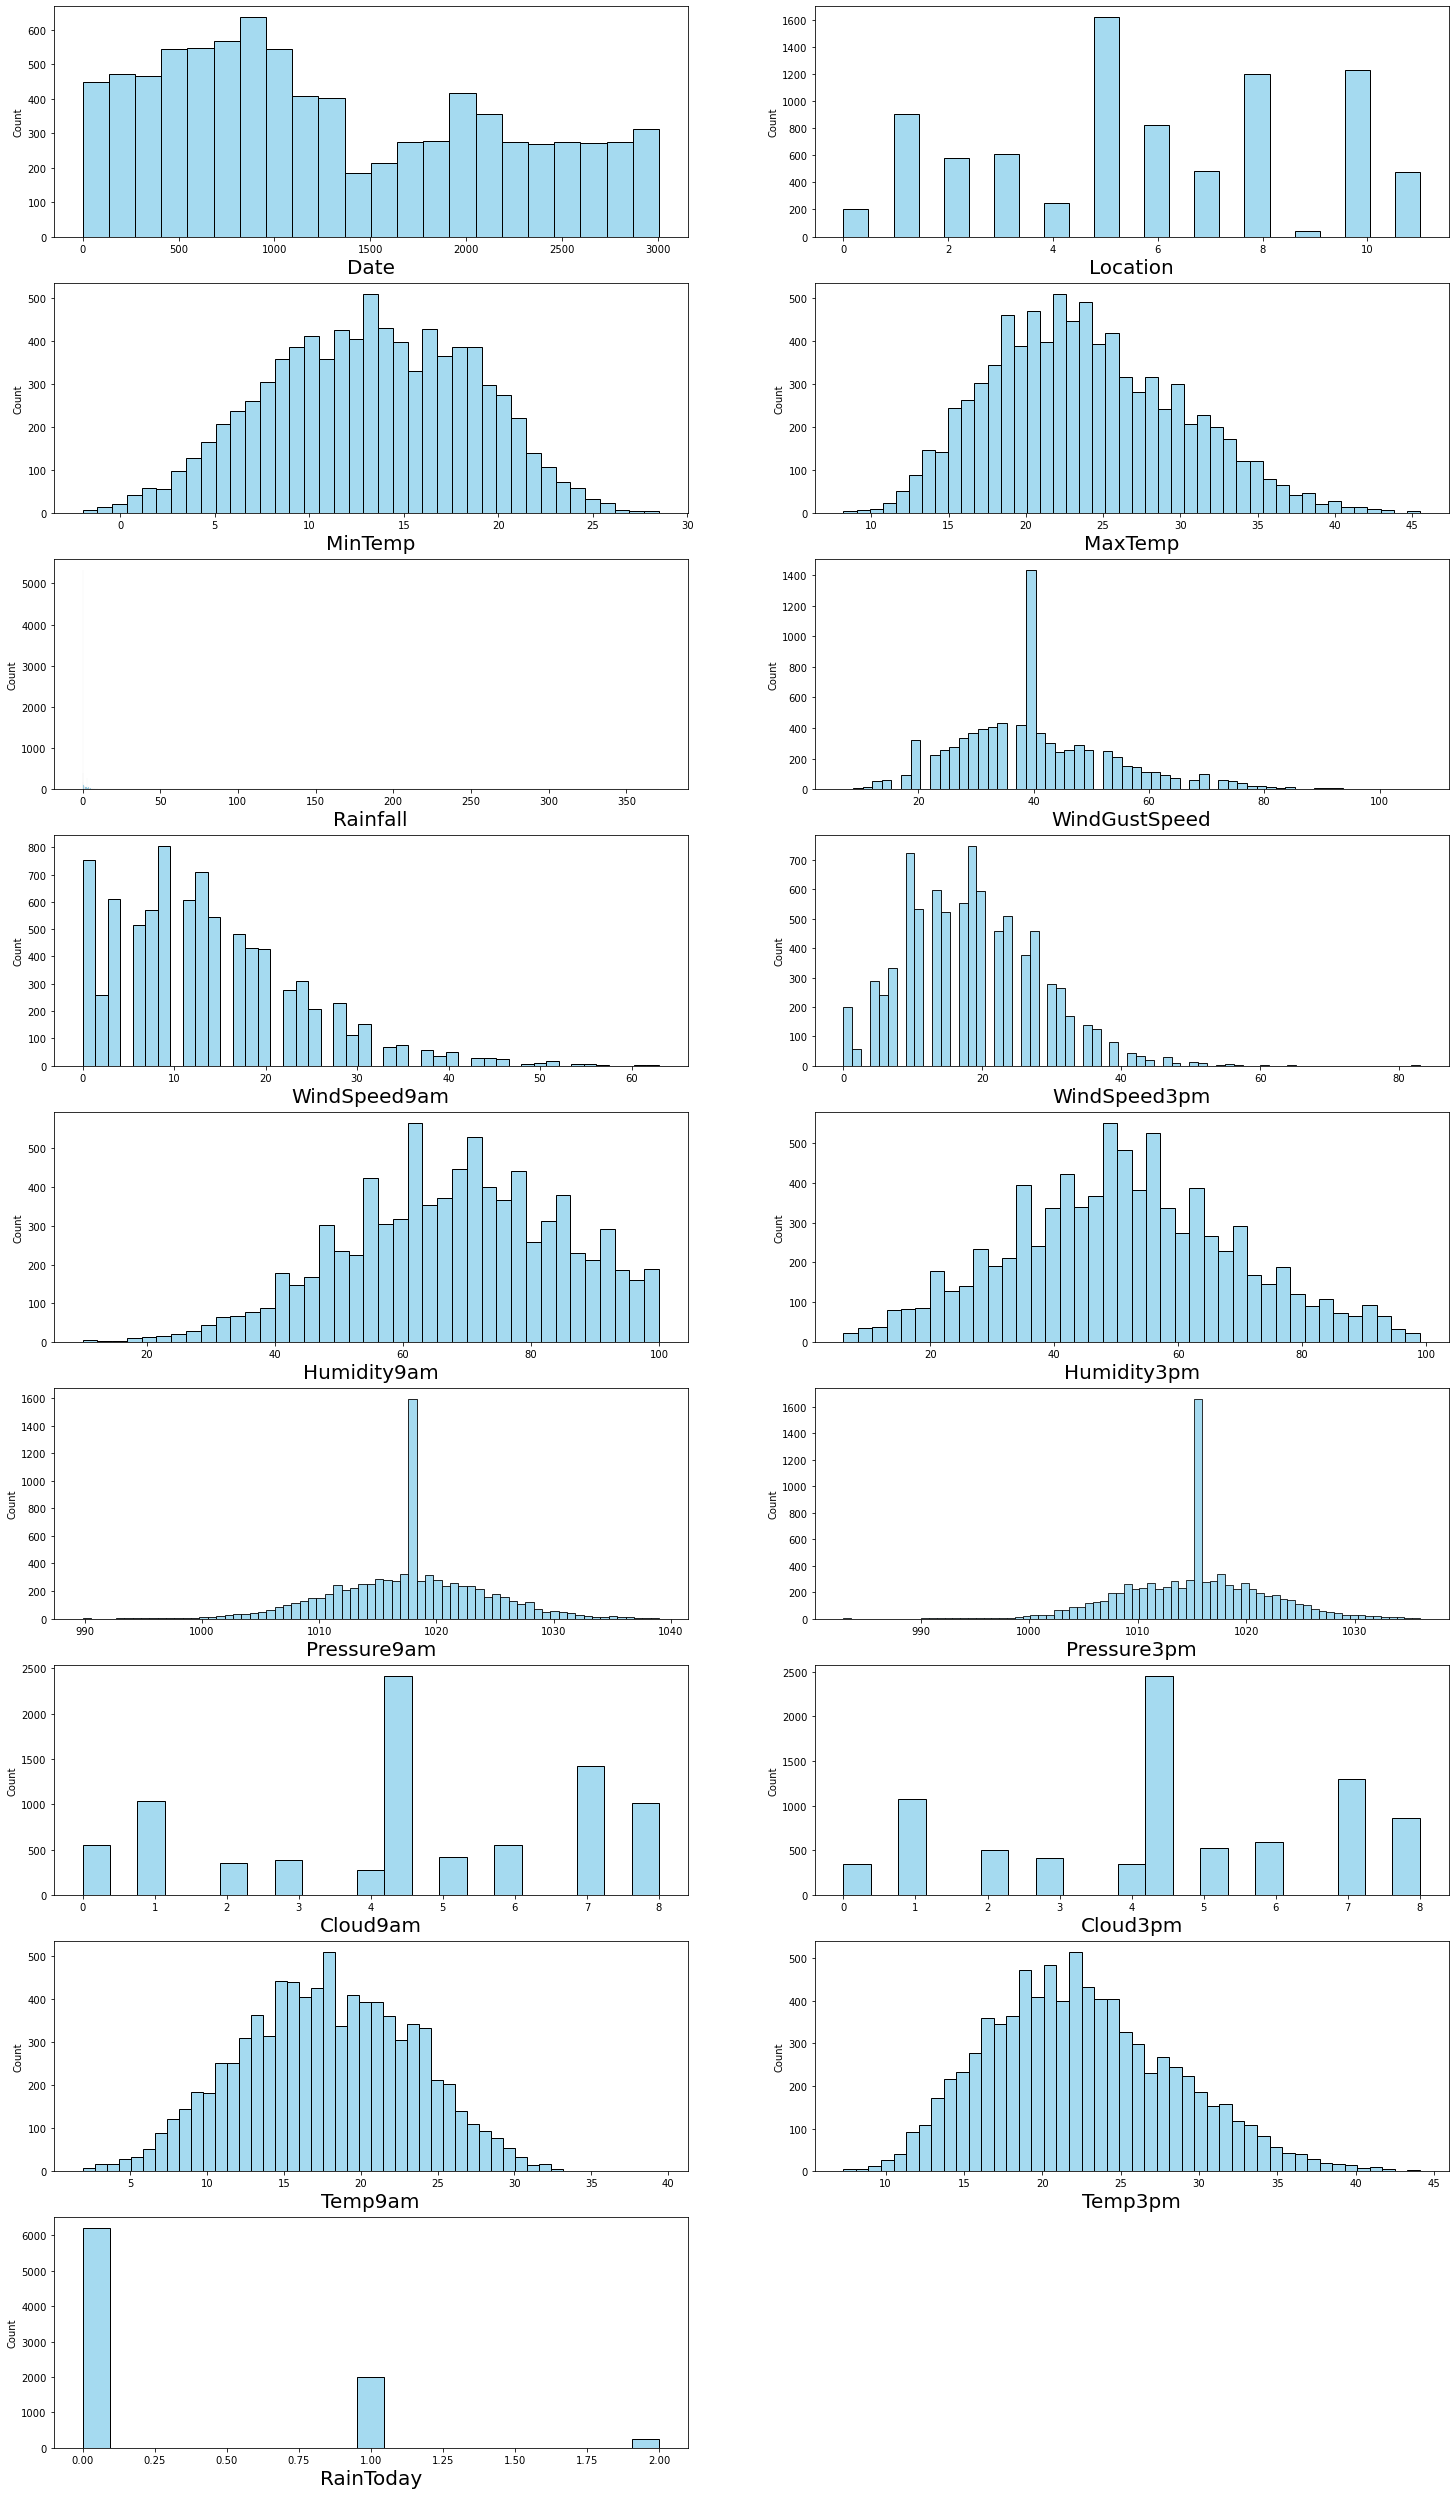

In [40]:
# using Histplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

According to the above images we obsereved that Temp9am, Temp3pm, Humidity3pm, MinTemp is equally distributed.

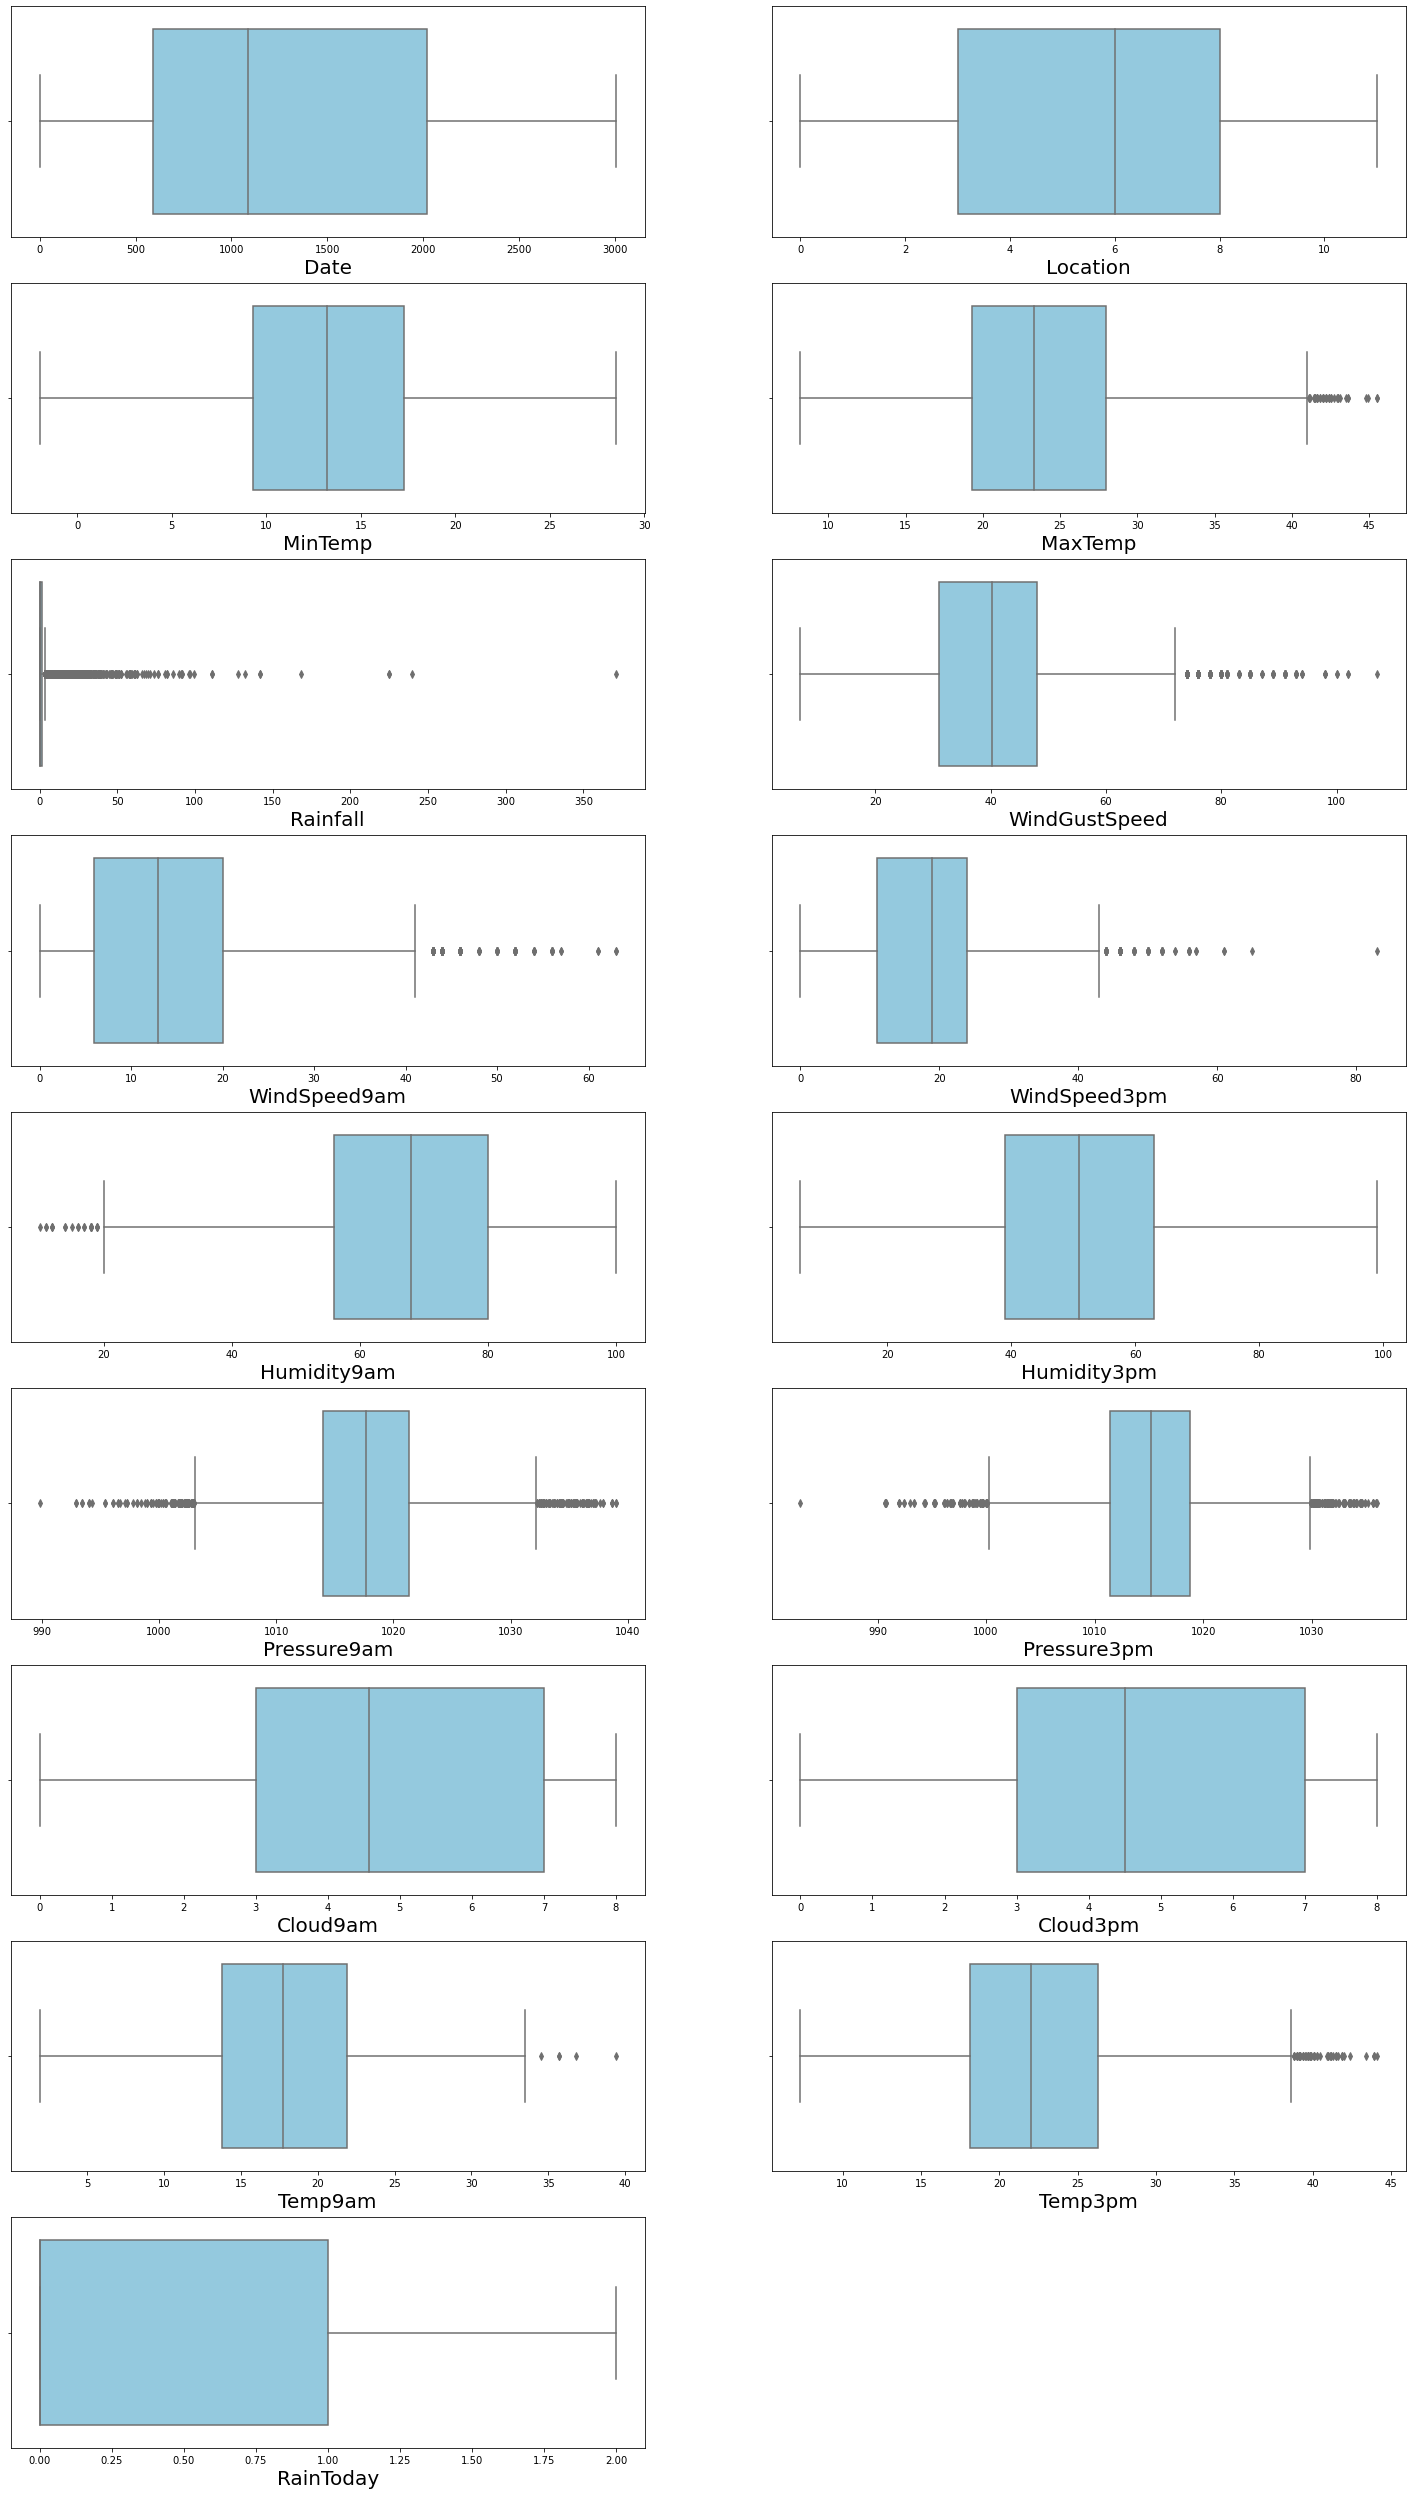

In [41]:
# Using Boxplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

According to the above images we obsereved that in boxplot Temp3pm, Temp9am, Pressure3pm, Pressure9am, Humidity9am, MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am and WindSpeed3pm input variable is having outliers in it. So, we need remove outliers from that the input variables.

# Removing outliers

In [42]:
# Using Zscore to removing outliers
#Features having outliers
features=df[['MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm']]

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.6,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.100000,0.0,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.700000,0.0,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.000000,0.0,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.300000,1.0,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3000,9,3.6,25.300000,0.0,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,3001,9,5.4,26.900000,0.0,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,3002,9,7.8,27.000000,0.0,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [44]:
#Checking shape of new dataset
df_new.shape

(8061, 18)

As per old shape is (8425, 23) and after removing outliers shape is (8061, 18)

In [45]:
Dataloss = (((8425-8061)/8425)*100)
Dataloss

4.320474777448071

As we observe that using zscore data loss is 4.32%.

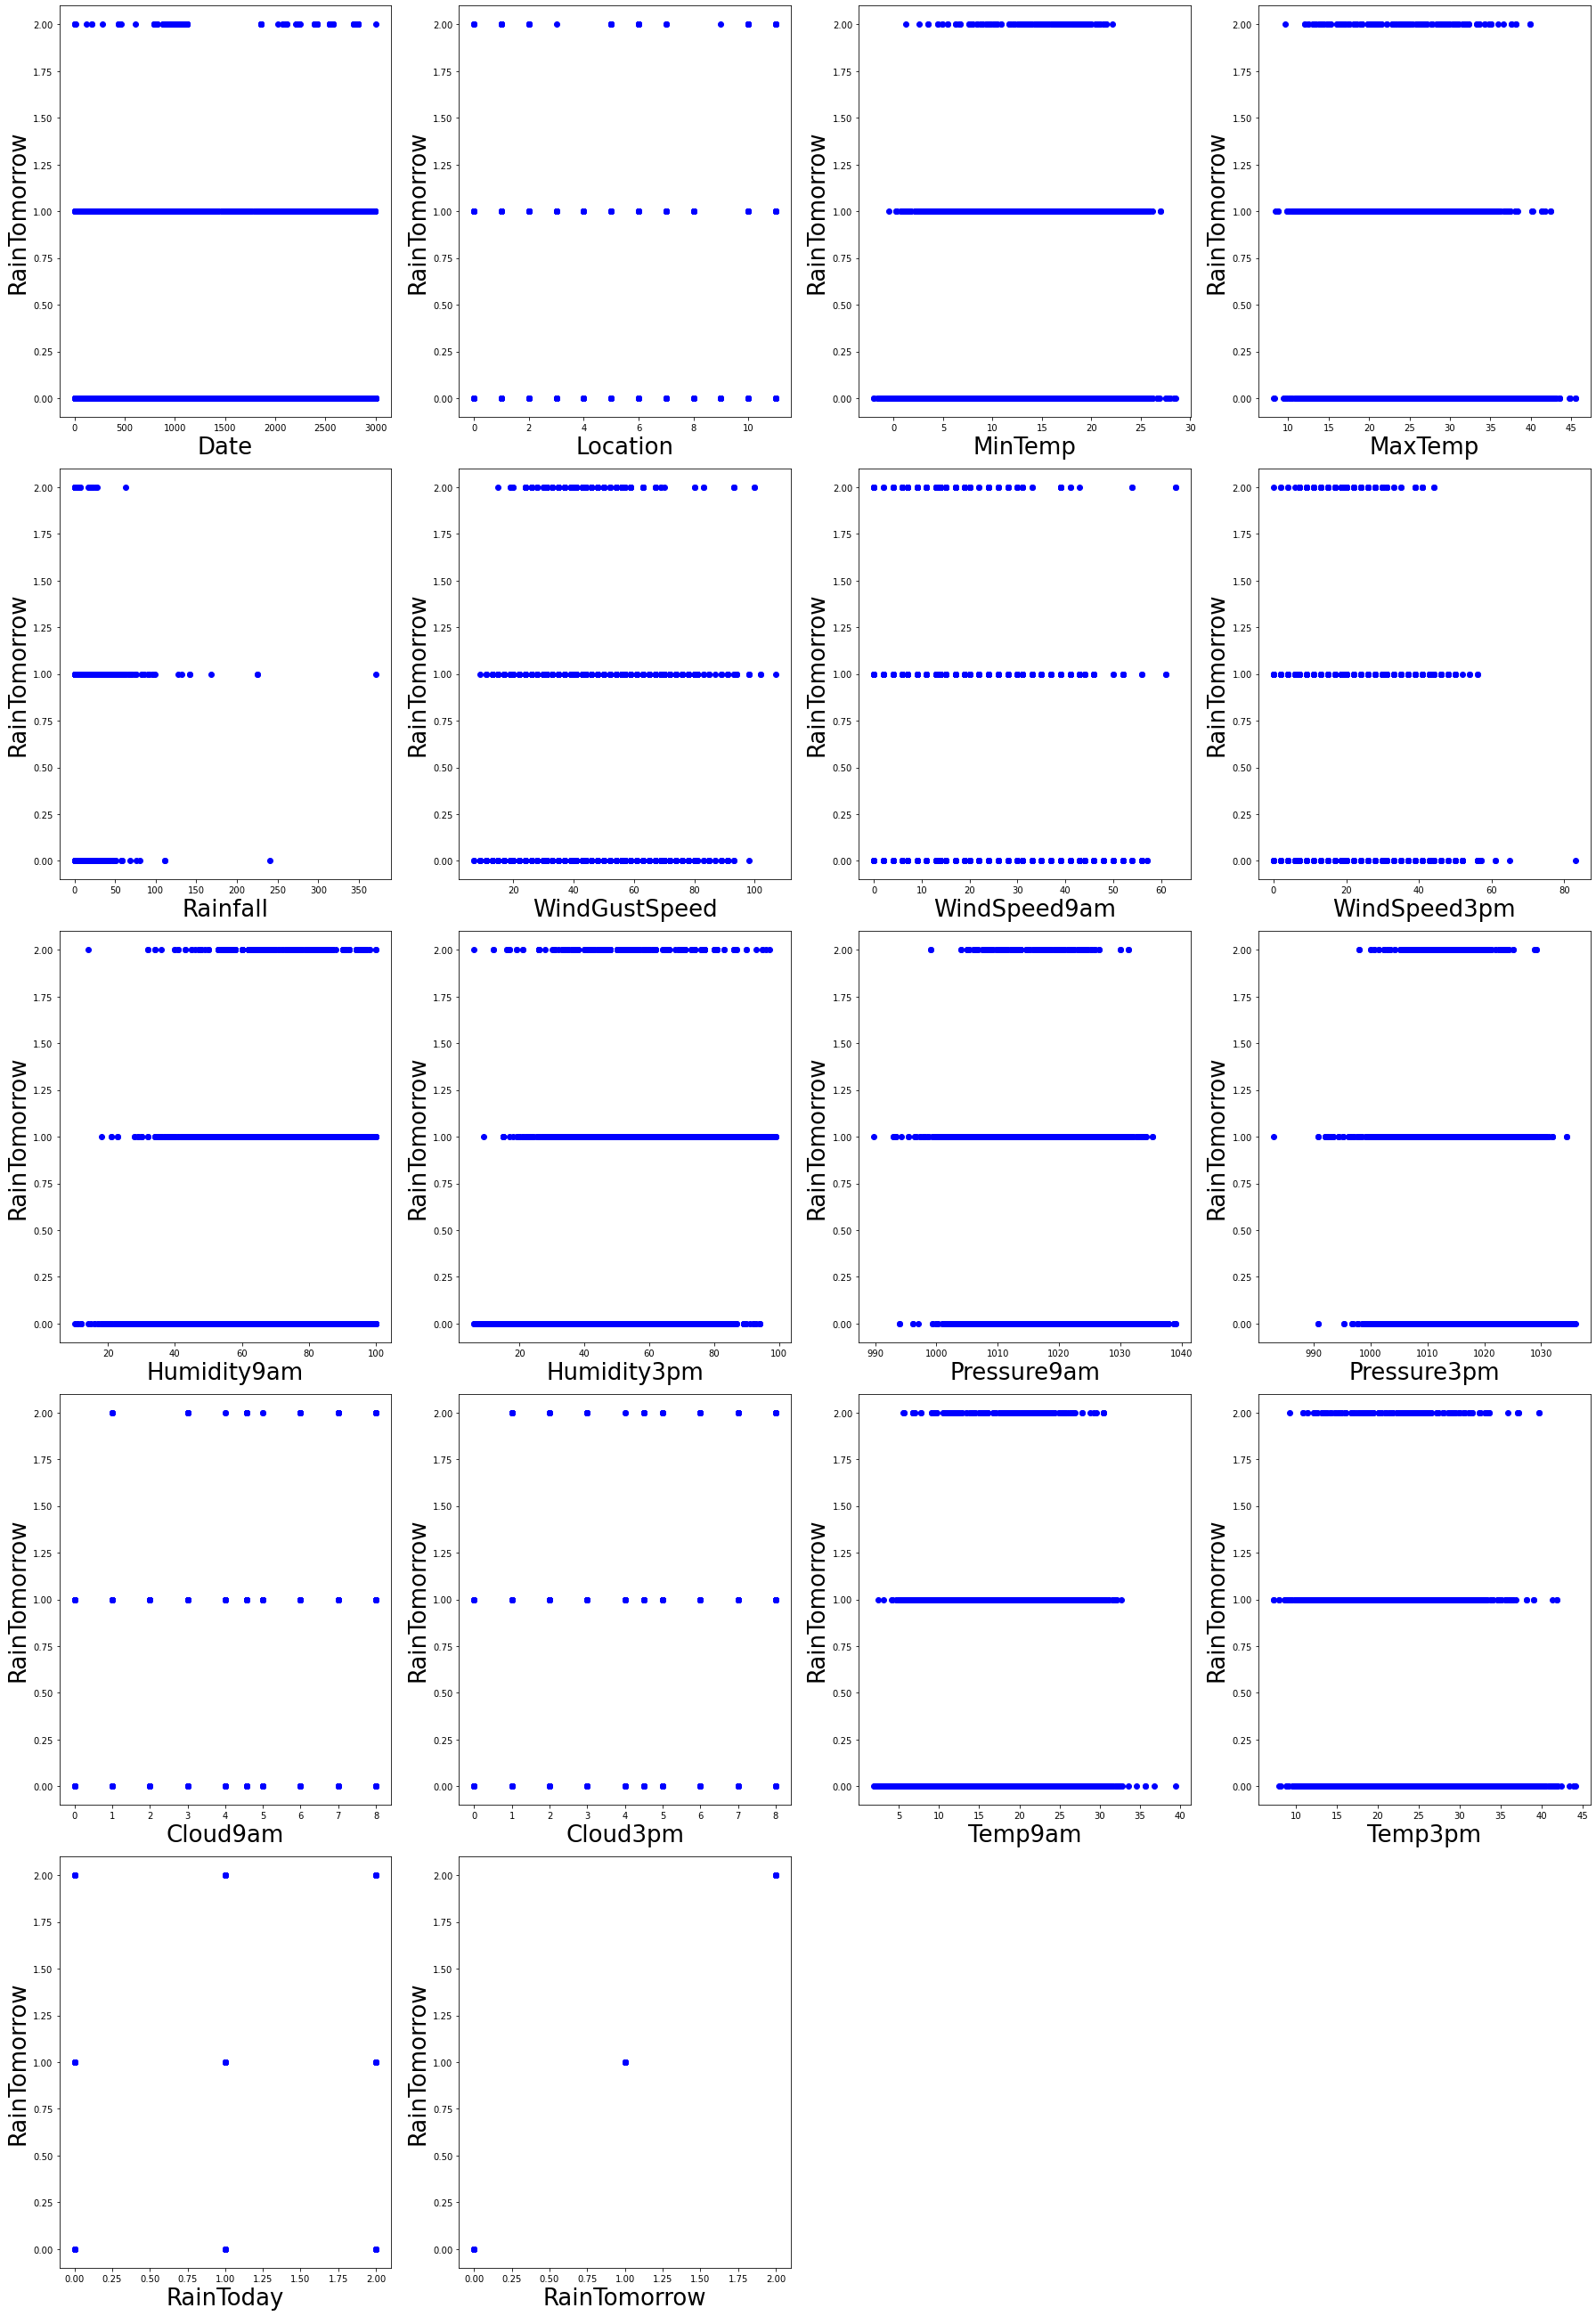

In [46]:
#Using Scatterplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['RainTomorrow'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('RainTomorrow', fontsize=26)
    plotnumber += 1
plt.tight_layout()

# Multivariate Analysis

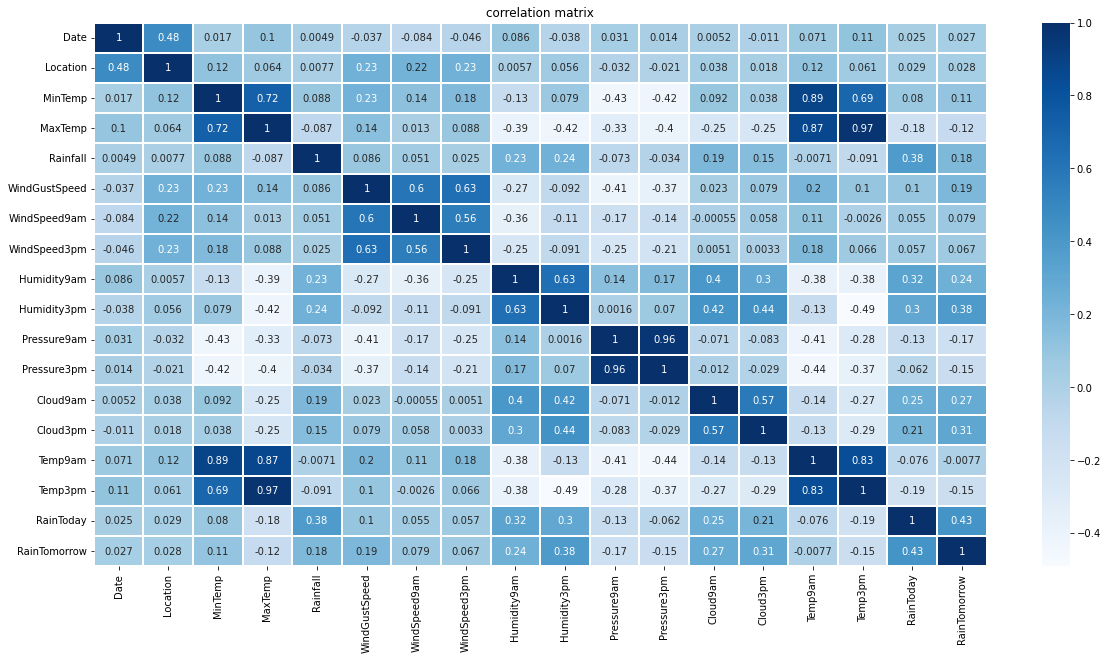

In [47]:
# using Heatmap
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

As per the above chart RainTomorrow is high corelation with Temp9am i.e. -0.0077% and than with MaxTemp i.e. -0.12%

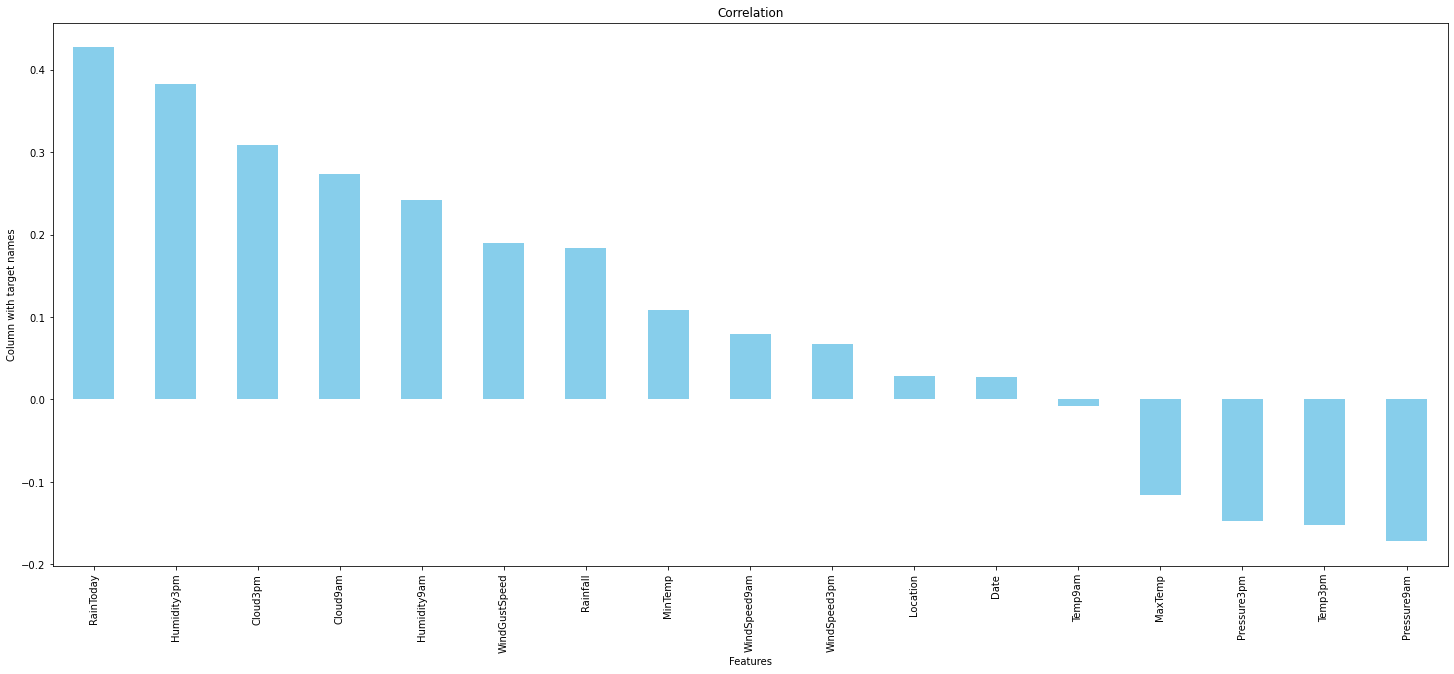

In [48]:
# Using correlation matrix
plt.figure(figsize =(25, 10))
df.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

According to the above image we observed that, the correlation matrix 'Pressure9am' have the strongest correlation with RainTomorrow but in negative nature shows (-0.2 approx) hightest correlation.
In positive side RainToday has the highest correlation of (0.4 approx).

In [49]:
#Checking for Skewness
df_new.skew()

Date             0.379144
Location        -0.052587
MinTemp         -0.091283
MaxTemp          0.308400
Rainfall         3.479013
WindGustSpeed    0.509872
WindSpeed9am     0.713295
WindSpeed3pm     0.296566
Humidity9am     -0.227711
Humidity3pm      0.127687
Pressure9am      0.015198
Pressure3pm      0.043661
Cloud9am        -0.357225
Cloud3pm        -0.263796
Temp9am         -0.045497
Temp3pm          0.327498
RainToday        1.584939
RainTomorrow     1.578685
dtype: float64

In [50]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.293175,0.293056
std,854.249434,3.162654,5.379488,6.114516,10.309308,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.514031,0.513752
min,0.000000,0.000000,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,1.000000,1.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2.000000,2.000000


# Scaling Data using StandardScaler

In [51]:
x = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

In [52]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [53]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [54]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.517879,-1.515776,0.038425,-0.157009,-0.213986,0.277710,0.607461,0.563297,0.189439,-1.597406,-1.584003,-1.308665,1.413459,3.862851e-16,-0.153712,-0.108138,-0.570379
1,-1.516709,-1.515776,-1.076989,0.202812,-0.272189,0.277710,-0.972321,0.357200,-1.420268,-1.433568,-1.121880,-1.196072,0.000000,3.862851e-16,-0.100217,0.312348,-0.570379
2,-1.515538,-1.515776,-0.054526,0.300945,-0.272189,0.422897,0.508725,0.769394,-1.777981,-1.160505,-1.599939,-1.051309,0.000000,-1.088680e+00,0.577390,0.127334,-0.570379
3,-1.514367,-1.515776,-0.742365,0.677121,-0.272189,-1.174166,-0.281166,-0.982428,-1.360650,-1.925081,-0.006411,-0.391836,0.000000,3.862851e-16,0.060269,0.682376,-0.570379
4,-1.513197,-1.515776,0.800625,1.380408,-0.175183,0.059928,-0.676112,0.151104,0.845246,-0.996668,-1.090010,-1.485596,1.001777,1.520830e+00,0.006773,1.220599,-0.570379


# Variance inflation factor

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.444671,Date
1,1.515810,Location
2,8.137654,MinTemp
3,26.091092,MaxTemp
4,1.221672,Rainfall
5,2.332496,WindGustSpeed
6,2.040123,WindSpeed9am
7,1.938483,WindSpeed3pm
8,3.892370,Humidity9am
9,5.462205,Humidity3pm


As per the above data in VIF values multicolinearity exists in Pressure3pm, Pressure9am ,MaxTemp, Temp3pm, Temp9am.
So, we drop Pressure3pm, Pressure9am ,MaxTemp, Temp3pm, Temp9am columns to avoid multicolinearity.

In [56]:
#Droping ER and RA
X = X.drop(['Pressure3pm', 'Pressure9am' ,'MaxTemp', 'Temp3pm', 'Temp9am'],axis=1)

In [57]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.402881,Date
1,1.502221,Location
2,1.138503,MinTemp
3,1.214970,Rainfall
4,2.066866,WindGustSpeed
5,1.916140,WindSpeed9am
6,1.867833,WindSpeed3pm
7,2.327926,Humidity9am
8,2.053326,Humidity3pm
9,1.696153,Cloud9am


Multicolinearity issue is solved.

# Splitting the data for training and testing

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8267405063291139  on Random_state  173


Splitting the data we conclude that Best accuracy is 82.67% on Random state 173.

# Model Building for RainTomorrow

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [60]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [61]:
model=[LogisticRegression(),KNeighborsClassifier(),AdaBoostClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),MLPClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("*******************************************************************************")

*******************************************************************************
accuracy score of -> LogisticRegression()
0.8267405063291139
[[1783  114    0]
 [ 261  307    0]
 [  45   18    0]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1897
           1       0.70      0.54      0.61       568
           2       0.00      0.00      0.00        63

    accuracy                           0.83      2528
   macro avg       0.52      0.49      0.50      2528
weighted avg       0.80      0.83      0.81      2528

[0.82433234 0.75845697 0.75014837 0.79940653 0.82789318]
0.7920474777448071
Difference between Accuracy score and cross validation score is -  0.034693028584306784
*******************************************************************************
*******************************************************************************
accuracy score of -> KNeighborsClassifier()
0.8180379746835443
[[1775  110   12]
 [ 288  274    6]


RandomForestClassifier model have heighest accuracy i.e. 89.63% with cross validation score i.e 83.29%  which is good.

# Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators': range(0,20),
            'learning_rate': [0.1,0.01,0.001,0.0001,1],
            'algorithm':['SAMME', 'SAMME.R'],
            'random_state':range(0,20)}

clf=GridSearchCV(AdaBoostClassifier(), parameters,cv=5)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 5,
 'random_state': 0}

In [63]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.8061708860759493

In [64]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8061708860759493
[[1776  110   11]
 [ 318  232   18]
 [  26    7   30]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1897
           1       0.66      0.41      0.51       568
           2       0.51      0.48      0.49        63

    accuracy                           0.81      2528
   macro avg       0.67      0.61      0.63      2528
weighted avg       0.79      0.81      0.79      2528



Hyper Parameter Tuning gives 80.61% accuracy.

# Saving model

In [ ]:
import joblib
joblib.dump(clf.best_estimator_,"Rainfall_Prediction.obj")
SVR_from_joblib=joblib.load("Rainfall_Prediction.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

# Prediction

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

The conclusion of the dataset is best model is Random Forest Classifier is best model.